In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [19]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [20]:
Taiping = df['SiteName'].isin(['太平']) #找太平測站
df[Taiping]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460292,461587,太平,臺中市,51.0,細懸浮微粒,普通,2.0,0.7,NaN,21,...,34.0,16.0,12.1,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460381,461676,太平,臺中市,50.0,細懸浮微粒,良好,1.7,0.7,NaN,14,...,29.0,15.0,13.7,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460440,461735,太平,臺中市,47.0,細懸浮微粒,良好,1.8,0.7,NaN,10,...,26.0,15.0,11.1,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460490,461785,太平,臺中市,45.0,細懸浮微粒,良好,2.0,0.6,NaN,7,...,24.0,14.0,7.7,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460578,461873,太平,臺中市,43.0,細懸浮微粒,良好,2.0,0.6,NaN,8,...,24.0,13.0,5.7,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460740,462035,太平,臺中市,43.0,細懸浮微粒,良好,2.1,0.5,NaN,9,...,24.0,13.0,6.2,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460829,462124,太平,臺中市,41.0,細懸浮微粒,良好,2.1,0.5,NaN,9,...,24.0,13.0,5.3,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461147,462442,太平,臺中市,33.0,細懸浮微粒,良好,1.5,0.3,NaN,15,...,18.0,10.0,7.0,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461238,462533,太平,臺中市,34.0,細懸浮微粒,良好,1.9,0.3,NaN,17,...,20.0,11.0,8.3,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461344,462639,太平,臺中市,36.0,細懸浮微粒,良好,1.7,0.3,NaN,19,...,22.0,11.0,10.1,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [21]:
Taiping = df['SiteName'].isin(['太平']) #找太平測站
Taiping=df[Taiping].fillna(method='ffill').drop(columns=['SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column


Taiping

,SO2,CO,O3,PM10,PM25,NO2
0,2.0,0.7,21,34.0,16.0,12.1
1,1.7,0.7,14,29.0,15.0,13.7
2,1.8,0.7,10,26.0,15.0,11.1
3,2.0,0.6,7,24.0,14.0,7.7
4,2.0,0.6,8,24.0,13.0,5.7
5,2.1,0.5,9,24.0,13.0,6.2
6,2.1,0.5,9,24.0,13.0,5.3
7,1.5,0.3,15,18.0,10.0,7.0
8,1.9,0.3,17,20.0,11.0,8.3
9,1.7,0.3,19,22.0,11.0,10.1


In [22]:
cd4 = Taiping['PM25'].isin([0])
Taiping[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2
147,0.0,0,0,0.0,0.0,13.9
150,0.0,0,0,0.0,0.0,8.6
151,0.0,0,0,0.0,0.0,8.6
152,0.0,0,0,0.0,0.0,8.6
153,0.0,0,0,0.0,0.0,8.6
316,0.0,0,0,0.0,0.0,10.2
317,0.0,0,0,0.0,0.0,10.2
318,0.0,0,0,0.0,0.0,10.2
319,0.0,0,0,0.0,0.0,10.2
413,0.0,0,0,0.0,0.0,8.5


In [23]:
Taiping.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值

Taiping

,SO2,CO,O3,PM10,PM25,NO2
0,2.0,0.70,21.0,34.0,16.0,12.1
1,1.7,0.70,14.0,29.0,15.0,13.7
2,1.8,0.70,10.0,26.0,15.0,11.1
3,2.0,0.60,7.0,24.0,14.0,7.7
4,2.0,0.60,8.0,24.0,13.0,5.7
5,2.1,0.50,9.0,24.0,13.0,6.2
6,2.1,0.50,9.0,24.0,13.0,5.3
7,1.5,0.30,15.0,18.0,10.0,7.0
8,1.9,0.30,17.0,20.0,11.0,8.3
9,1.7,0.30,19.0,22.0,11.0,10.1


In [24]:
Taiping.fillna(method='ffill', inplace=True) #以前面數字來取代0值


Taiping

,SO2,CO,O3,PM10,PM25,NO2
0,2.0,0.70,21.0,34.0,16.0,12.1
1,1.7,0.70,14.0,29.0,15.0,13.7
2,1.8,0.70,10.0,26.0,15.0,11.1
3,2.0,0.60,7.0,24.0,14.0,7.7
4,2.0,0.60,8.0,24.0,13.0,5.7
5,2.1,0.50,9.0,24.0,13.0,6.2
6,2.1,0.50,9.0,24.0,13.0,5.3
7,1.5,0.30,15.0,18.0,10.0,7.0
8,1.9,0.30,17.0,20.0,11.0,8.3
9,1.7,0.30,19.0,22.0,11.0,10.1


In [25]:
cd4 = Taiping['PM25'].isin([0])
Taiping[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2


In [26]:
Taiping['pr']=''
Taiping.drop([ 0,1],inplace=True)
Taiping.reset_index(drop=True,inplace=True)


Taiping.to_csv('Taipingpollution.csv')

Taiping

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.8,0.70,10.0,26.0,15.0,11.1,
1,2.0,0.60,7.0,24.0,14.0,7.7,
2,2.0,0.60,8.0,24.0,13.0,5.7,
3,2.1,0.50,9.0,24.0,13.0,6.2,
4,2.1,0.50,9.0,24.0,13.0,5.3,
5,1.5,0.30,15.0,18.0,10.0,7.0,
6,1.9,0.30,17.0,20.0,11.0,8.3,
7,1.7,0.30,19.0,22.0,11.0,10.1,
8,1.7,0.40,23.0,23.0,11.0,8.4,
9,1.6,0.30,28.0,24.0,11.0,8.9,


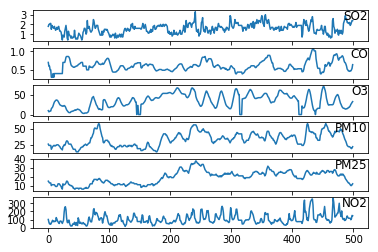

In [27]:
# load dataset
dataset =pd.read_csv('Taipingpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5]
i=1
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:500, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [28]:
dataset

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.8,0.70,10.0,26.0,15.0,103.0,NaN
1,2.0,0.60,7.0,24.0,14.0,69.0,NaN
2,2.0,0.60,8.0,24.0,13.0,49.0,NaN
3,2.1,0.50,9.0,24.0,13.0,54.0,NaN
4,2.1,0.50,9.0,24.0,13.0,45.0,NaN
5,1.5,0.30,15.0,18.0,10.0,62.0,NaN
6,1.9,0.30,17.0,20.0,11.0,75.0,NaN
7,1.7,0.30,19.0,22.0,11.0,93.0,NaN
8,1.7,0.40,23.0,23.0,11.0,76.0,NaN
9,1.6,0.30,28.0,24.0,11.0,81.0,NaN


In [29]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-0.087243,0.786524,-1.084512,-1.131922,-0.420398,-0.362997,15.0
1,0.094791,0.300398,-1.253190,-1.227514,-0.518463,-0.773083,14.0
2,0.094791,0.300398,-1.196964,-1.227514,-0.616529,-1.014309,13.0
3,0.185807,-0.185727,-1.140738,-1.227514,-0.616529,-0.954003,13.0
4,0.185807,-0.185727,-1.140738,-1.227514,-0.616529,-1.062555,13.0
5,-0.360292,-1.157978,-0.803381,-1.514291,-0.910725,-0.857512,10.0
6,0.003774,-1.157978,-0.690928,-1.418698,-0.812660,-0.700715,11.0
7,-0.178259,-1.157978,-0.578476,-1.323106,-0.812660,-0.483611,11.0
8,-0.178259,-0.671853,-0.353571,-1.275310,-0.812660,-0.688653,11.0
9,-0.269276,-1.157978,-0.072440,-1.227514,-0.812660,-0.628347,11.0


In [30]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 




In [31]:
#Training data & Validation data
#將Training Data取一部份當作Validation Data
def splitData(X,Y,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [32]:
#合併輸出

# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [33]:
X_train.shape

(6147, 12, 6)

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 6))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 903       
__________

5532/5532 [==============================] - 1s 262us/step - loss: 22.2039 - val_loss: 13.2485
Epoch 64/500
5532/5532 [==============================] - 1s 270us/step - loss: 22.3023 - val_loss: 13.1271
Epoch 65/500
5532/5532 [==============================] - 1s 268us/step - loss: 21.7161 - val_loss: 13.0209
Epoch 66/500
5532/5532 [==============================] - 1s 269us/step - loss: 21.7517 - val_loss: 13.2307
Epoch 67/500
5532/5532 [==============================] - 1s 259us/step - loss: 21.9142 - val_loss: 13.2904
Epoch 68/500
5532/5532 [==============================] - 1s 258us/step - loss: 21.1055 - val_loss: 13.1410
Epoch 69/500
5532/5532 [==============================] - 1s 253us/step - loss: 21.8755 - val_loss: 13.5473
Epoch 70/500
5532/5532 [==============================] - 1s 266us/step - loss: 21.0557 - val_loss: 13.1911
Epoch 71/500
5532/5532 [==============================] - 1s 271us/step - loss: 21.9186 - val_loss: 13.0130
Epoch 72/500
5532/5532 [=================

5532/5532 [==============================] - 2s 283us/step - loss: 18.9725 - val_loss: 11.9763
Epoch 139/500
5532/5532 [==============================] - 2s 279us/step - loss: 18.4282 - val_loss: 11.7180
Epoch 140/500
5532/5532 [==============================] - 2s 278us/step - loss: 18.5250 - val_loss: 11.7618
Epoch 141/500
5532/5532 [==============================] - 1s 263us/step - loss: 18.2302 - val_loss: 11.6592
Epoch 142/500
5532/5532 [==============================] - 1s 254us/step - loss: 18.0204 - val_loss: 11.4318
Epoch 143/500
5532/5532 [==============================] - 1s 260us/step - loss: 17.6297 - val_loss: 11.5324
Epoch 144/500
5532/5532 [==============================] - 2s 288us/step - loss: 18.6525 - val_loss: 12.1651
Epoch 145/500
5532/5532 [==============================] - 2s 277us/step - loss: 18.0713 - val_loss: 11.5325
Epoch 146/500
5532/5532 [==============================] - 1s 253us/step - loss: 18.5227 - val_loss: 11.6911
Epoch 147/500
5532/5532 [========

5532/5532 [==============================] - 1s 263us/step - loss: 16.4815 - val_loss: 10.2058
Epoch 214/500
5532/5532 [==============================] - 1s 245us/step - loss: 16.5923 - val_loss: 9.9841
Epoch 215/500
5532/5532 [==============================] - 1s 244us/step - loss: 16.0678 - val_loss: 10.1708
Epoch 216/500
5532/5532 [==============================] - 1s 238us/step - loss: 16.7208 - val_loss: 10.6567
Epoch 217/500
5532/5532 [==============================] - 1s 233us/step - loss: 16.6524 - val_loss: 10.6714
Epoch 218/500
5532/5532 [==============================] - 1s 241us/step - loss: 16.2540 - val_loss: 10.5201
Epoch 219/500
5532/5532 [==============================] - 1s 243us/step - loss: 16.2795 - val_loss: 10.8885
Epoch 220/500
5532/5532 [==============================] - 1s 260us/step - loss: 16.5544 - val_loss: 10.2675
Epoch 221/500
5532/5532 [==============================] - 1s 257us/step - loss: 16.7575 - val_loss: 10.7484
Epoch 222/500
5532/5532 [=========

5532/5532 [==============================] - 1s 266us/step - loss: 14.3702 - val_loss: 9.2815
Epoch 289/500
5532/5532 [==============================] - 1s 248us/step - loss: 14.3481 - val_loss: 9.3197
Epoch 290/500
5532/5532 [==============================] - 1s 260us/step - loss: 14.7861 - val_loss: 9.2210
Epoch 291/500
5532/5532 [==============================] - 1s 238us/step - loss: 14.6060 - val_loss: 9.7286
Epoch 292/500
5532/5532 [==============================] - 1s 243us/step - loss: 15.0791 - val_loss: 9.7966
Epoch 293/500
5532/5532 [==============================] - 1s 228us/step - loss: 14.7277 - val_loss: 9.0958
Epoch 294/500
5532/5532 [==============================] - 1s 259us/step - loss: 14.6253 - val_loss: 9.0391
Epoch 295/500
5532/5532 [==============================] - 1s 262us/step - loss: 14.2651 - val_loss: 9.1430
Epoch 296/500
5532/5532 [==============================] - 1s 237us/step - loss: 14.5712 - val_loss: 9.4162
Epoch 297/500
5532/5532 [=================

Epoch 364/500
5532/5532 [==============================] - 2s 272us/step - loss: 13.3090 - val_loss: 8.3091
Epoch 365/500
5532/5532 [==============================] - 1s 249us/step - loss: 12.9746 - val_loss: 7.9616
Epoch 366/500
5532/5532 [==============================] - 1s 263us/step - loss: 13.3060 - val_loss: 8.1505
Epoch 367/500
5532/5532 [==============================] - 1s 262us/step - loss: 12.7457 - val_loss: 7.9344
Epoch 368/500
5532/5532 [==============================] - 1s 265us/step - loss: 12.7993 - val_loss: 7.8203
Epoch 369/500
5532/5532 [==============================] - 1s 259us/step - loss: 12.5323 - val_loss: 7.7586
Epoch 370/500
5532/5532 [==============================] - 1s 263us/step - loss: 12.9080 - val_loss: 7.7045
Epoch 371/500
5532/5532 [==============================] - 1s 266us/step - loss: 12.9685 - val_loss: 8.0419
Epoch 372/500
5532/5532 [==============================] - 1s 267us/step - loss: 13.3136 - val_loss: 8.2813
Epoch 373/500
5532/5532 [===

Epoch 440/500
5532/5532 [==============================] - 1s 196us/step - loss: 12.4423 - val_loss: 7.6524
Epoch 441/500
5532/5532 [==============================] - 1s 197us/step - loss: 12.0290 - val_loss: 7.2694
Epoch 442/500
5532/5532 [==============================] - 1s 206us/step - loss: 12.3600 - val_loss: 7.2171
Epoch 443/500
5532/5532 [==============================] - 1s 193us/step - loss: 12.4473 - val_loss: 7.0015
Epoch 444/500
5532/5532 [==============================] - 1s 200us/step - loss: 11.7458 - val_loss: 7.0454
Epoch 445/500
5532/5532 [==============================] - 1s 193us/step - loss: 12.2019 - val_loss: 7.2232
Epoch 446/500
5532/5532 [==============================] - 1s 189us/step - loss: 11.8620 - val_loss: 7.3791
Epoch 447/500
5532/5532 [==============================] - 1s 192us/step - loss: 11.5273 - val_loss: 6.8032
Epoch 448/500
5532/5532 [==============================] - 1s 201us/step - loss: 12.2588 - val_loss: 6.9314
Epoch 449/500
5532/5532 [===

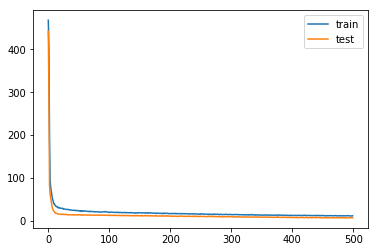

In [34]:
from keras.layers import Dropout


def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Taipingmodel.h5')
del model

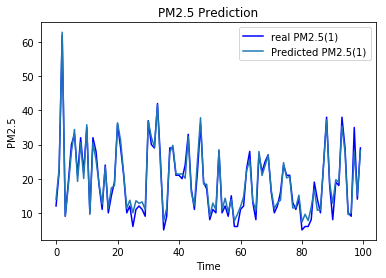

Train 0.6870017894908085
Validation 0.6530014641288433
1.6386833835085365e+34
The R2 score on the Test set is:	0.937
Train Score: 2.30 RMSE
Test Score: 2.68 RMSE
The MSE   on the Test set is: 7.193606534462026
The RMSE  on the Test set is: 2.6820899564447918
The MAE   on the Test set is: 1.9563547219972786
The MAPE  on the Test set is: 0.027103239925283684
The SMAPE on the Test set is: 0.021280453878582798


In [35]:
#讀取model
model = load_model('Taipingmodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
